# Data visualization using `ggplot2`

The `ggplot2` plotting package is built on R's low-level graphics `grid` library with philosophy along the lines of the **`Grammar of graphics`** a book written by Leland Wilkinson on a approach to visualizating data. Specifically `ggplot2` uses chart components and combines them together.

The `ggplot2` package has two main functions for creating plots:

* The `qplot` function a function for creating plots quickly.
* The `ggplot` function a full featured interface for plotting.

In [1]:
# Load the packages
require(ggplot2)
require(data.table)

Loading required package: ggplot2
Loading required package: data.table


In [2]:
# Load the datasets

# Simulated HR data obtained from Kaggle
auto <- fread("../data/auto/auto.csv")
# The loan data we used previously
loan <- fread("../data/loan/loan.csv")

In [3]:
print(auto[1:2,])

             car price      body mileage engV engType registration year   model
1:          Ford 15500 crossover      68  2.5     Gas          yes 2010    Kuga
2: Mercedes-Benz 20500     sedan     173  1.8     Gas          yes 2011 E-Class
   drive
1:  full
2:  rear


## Plotting points with `qplot` and `ggplot`

### Plotting points with `qplot`

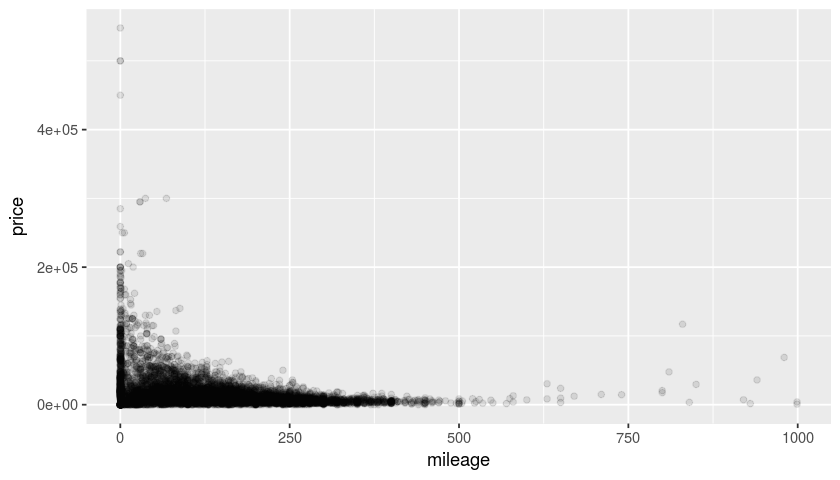

In [4]:
options(repr.plot.width = 7, repr.plot.height = 4)

# Using the `qplot` function
qplot(x = mileage, y = price, geom = "point", data = auto, alpha = I(0.1))

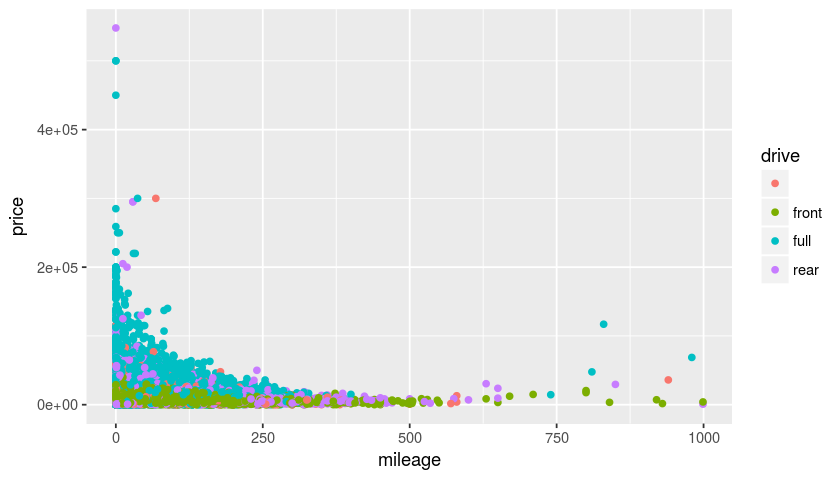

In [5]:
# Colour by variable
qplot(x = mileage, y = price, geom = "point", data = auto, colour = drive)

In the plot below, note how we add up plot components to make up the plot. In fact `ggplot2's` charts exists as data objects that can be assigned to variables, which we will be looking at later.

Warning message:
“Transformation introduced infinite values in continuous y-axis”

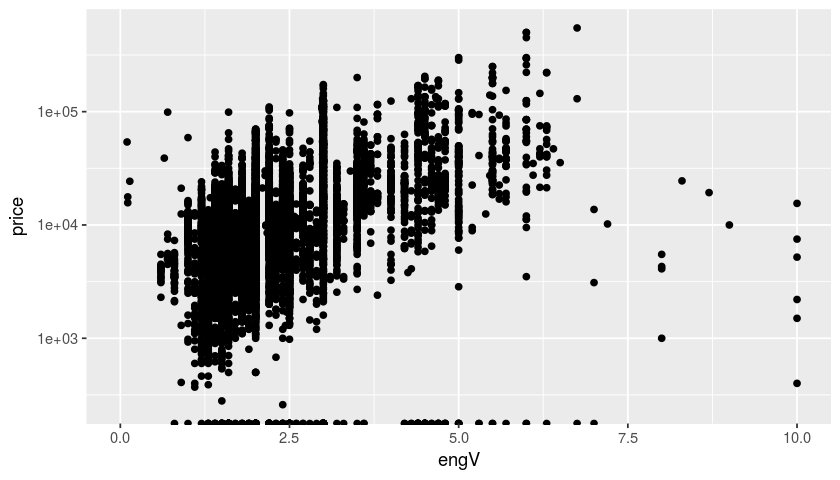

In [6]:
# Specify the x scale and a log y scale
qplot(x = engV, y = price, geom = "point", data = auto, na.rm = TRUE) + xlim(0, 10) + scale_y_log10()

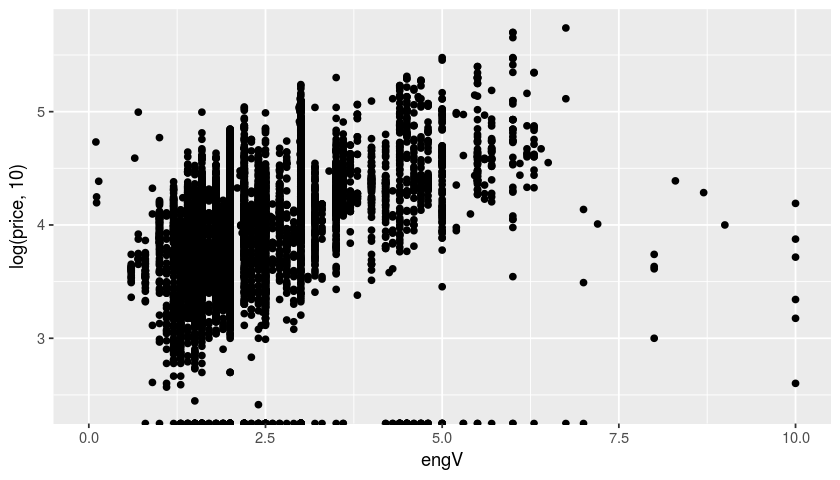

In [7]:
# Functions of variables can also be used
qplot(x = engV, y = log(price, 10), geom = "point", data = auto, na.rm = TRUE) + xlim(0, 10)

### Plotting points with `ggplot` and `geom_point` functions

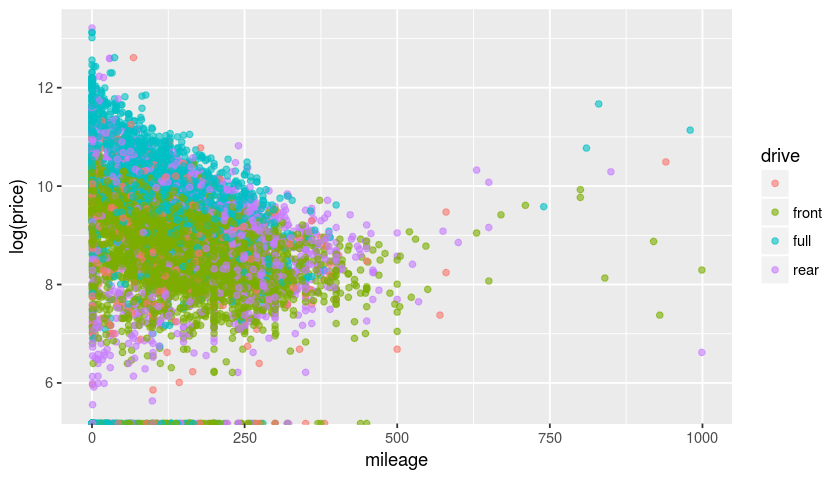

In [8]:
# With the ggplot function, you need specify a geom
ggplot(aes(x = mileage, y = log(price), colour = drive), data = auto) + geom_point(alpha = I(0.6))

### Plotting lines and smooths with `qplot`

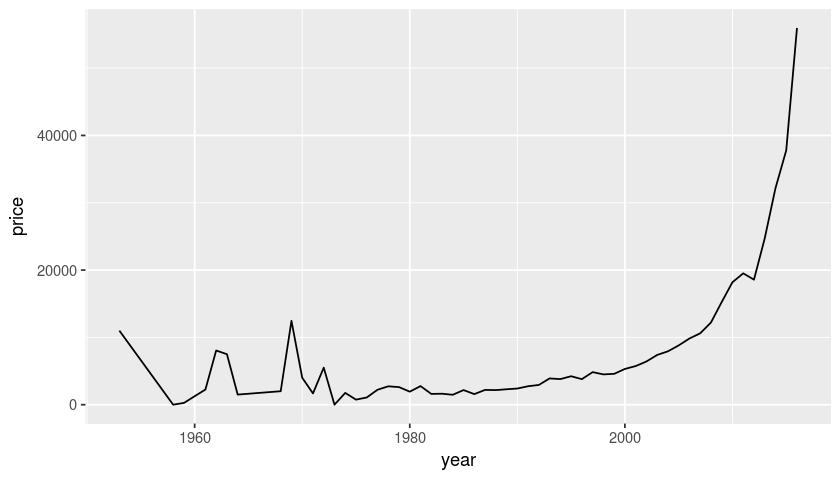

In [9]:
# Standard line plot
auto[, .(price = mean(price)), by = year][, qplot(x = year, y = price, geom = "line")]

`geom_smooth()` using method = 'loess'


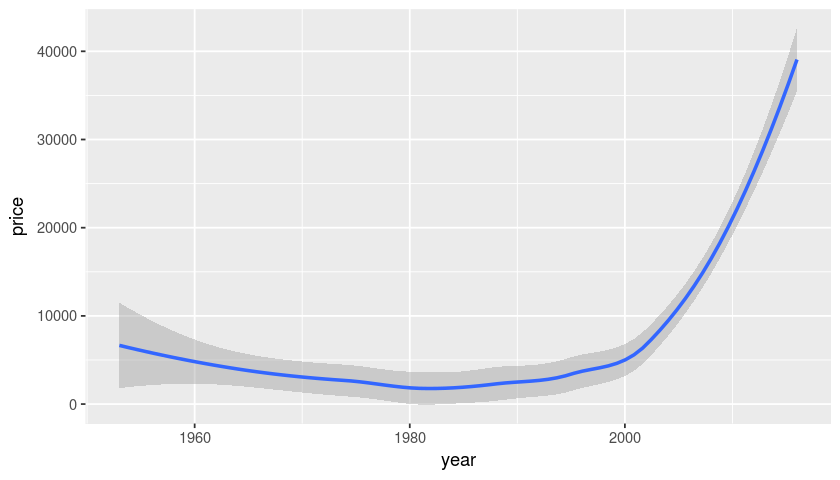

In [10]:
# Plotting a smooth
auto[, .(price = mean(price)), by = year][, qplot(x = year, y = price, geom = "smooth")]

### Plotting points and smooths

In the above chart, we plotted a loess smooth of points but the line is not much use without the points that go with it:

`geom_smooth()` using method = 'loess'


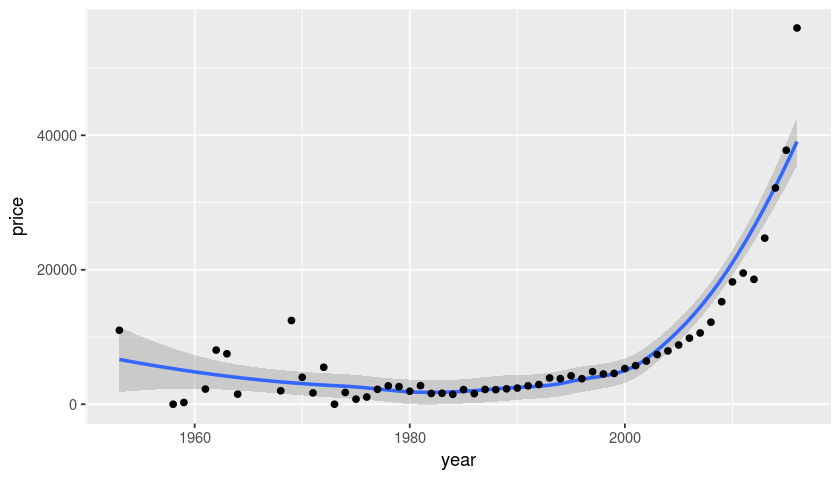

In [11]:
auto[, .(price = mean(price)), by = year][, qplot(x = year, y = price, geom = "smooth") + geom_point()]

### Plotting points lines and smooths with `ggplot`

The equivalent call for the above `qplot` for `ggplot` function is given by:

In [12]:
# Create the average price data and assign it to a variable
price_year <- auto[, .(price = mean(price)), by = year]

# Here we assign the ggplot object to a variable
# At this state we don't yet have a chart
p <- ggplot(aes(x = year, y = price), data = price_year)

`geom_smooth()` using method = 'loess'


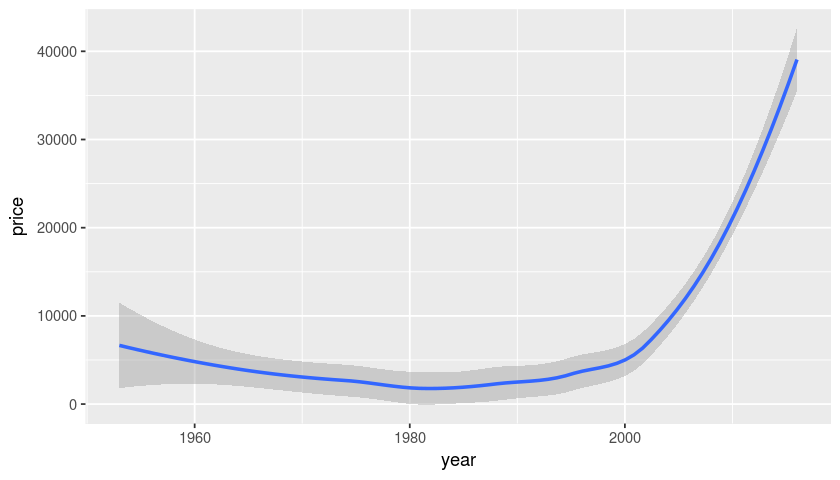

In [13]:
# Next we add the smooth layer
p <- p + geom_smooth()
p

`geom_smooth()` using method = 'loess'


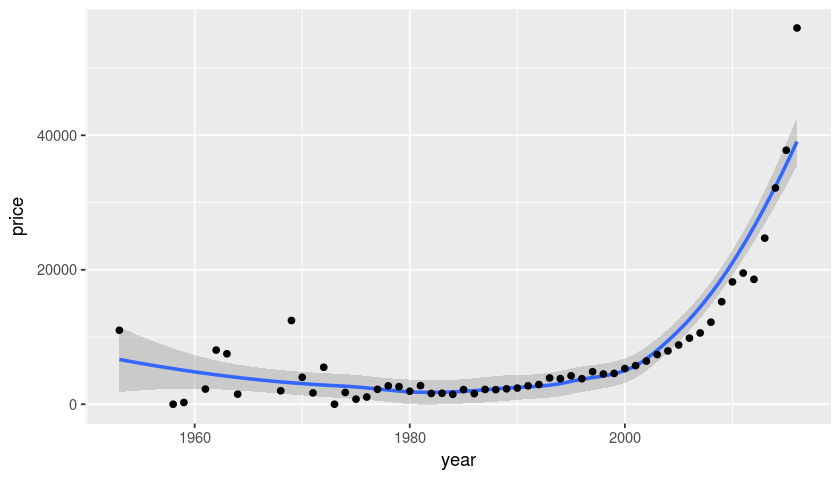

In [14]:
# The we add the points layer
p + geom_point()

This means that we can treat plots like any other data structure, write it to file for storage, pass it as parameters in functions and so on.

I want to know how this price varies by `year` and `drive`:

In [15]:
# Create the plot data
price_year_drive <- auto[, .(price = mean(price)), by = .(year, drive)]

`geom_smooth()` using method = 'loess'


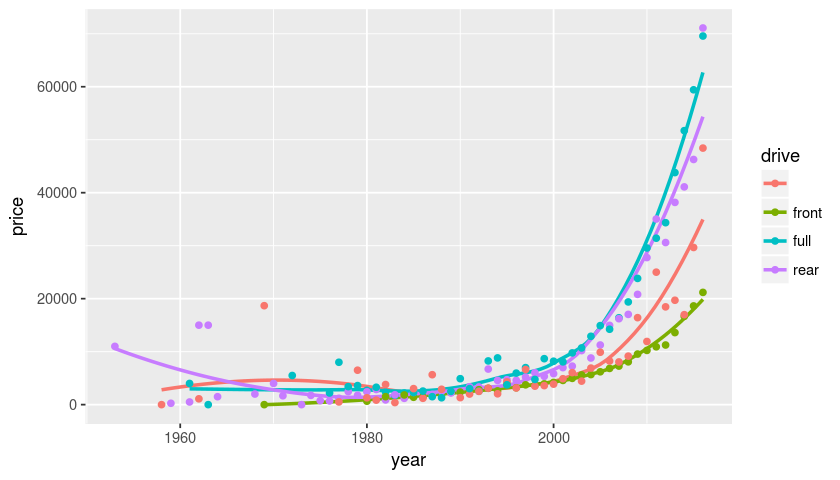

In [35]:
# Plotting the points with the smooth but no standard error
p <- ggplot(aes(x = year, y = price, colour = drive), data = price_year_drive) + geom_smooth(se = FALSE) + geom_point()
p

### Chart title and axes labels

`geom_smooth()` using method = 'loess'


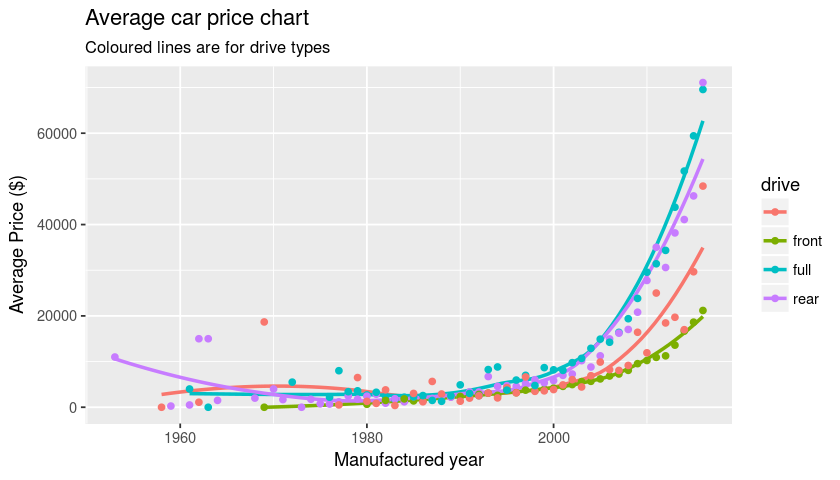

In [51]:
# Axis titles using `xlab` and `ylab`
p + xlab("Manufactured year") + ylab("Average Price ($)") + 
       ggtitle("Average car price chart", 
               subtitle = "Coloured lines are for drive types")

`geom_smooth()` using method = 'loess'


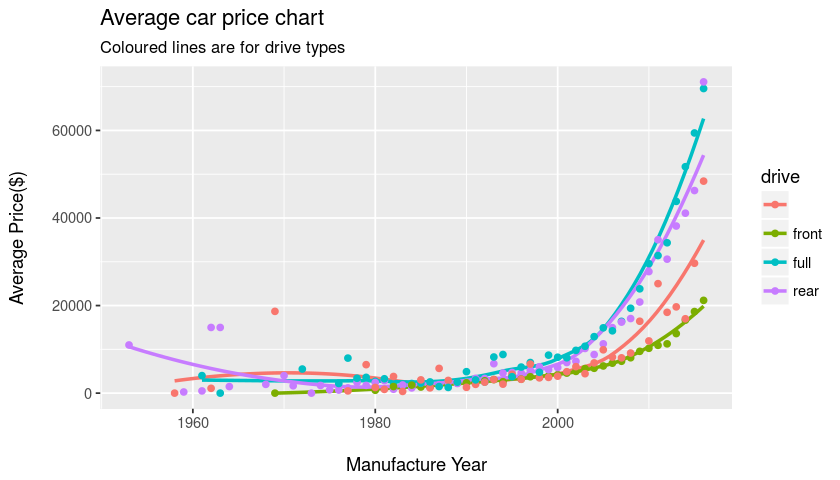

In [55]:
# All titles using `title`
p + labs(title = "Average car price chart", subtitle = "Coloured lines are for drive types", 
          x = "\nManufacture Year", y = "Average Price($)\n")

## Faceting

In `ggplot2` faceting is used for displaying chart panels.

`geom_smooth()` using method = 'loess'


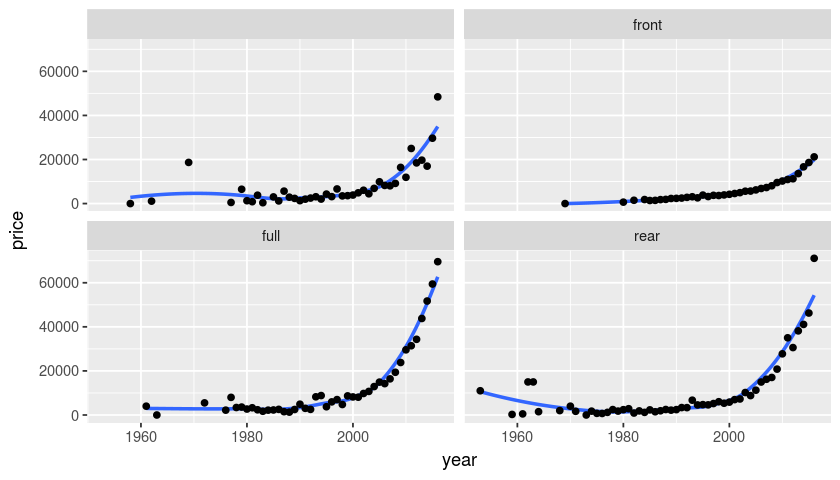

In [17]:
# Displaying plots using facet_wrap
p <- ggplot(aes(x = year, y = price), data = price_year_drive) + geom_smooth(se = FALSE) + 
         geom_point()
p + facet_wrap( ~ drive)

`geom_smooth()` using method = 'loess'


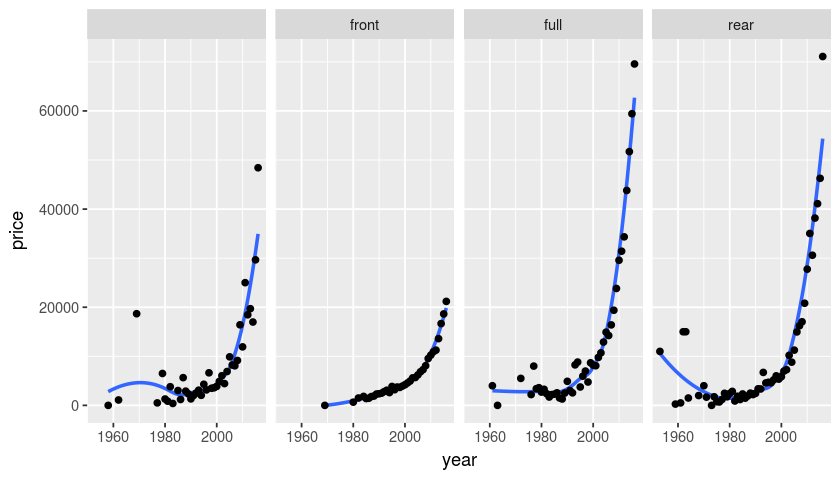

In [18]:
# Choosing the number of rows to display
p + facet_wrap( ~ drive, nrow = 1)

### A word on legends

The `ggplot2` documentation for legends is located [here](http://ggplot2.tidyverse.org/reference/guide_legend.html). We will outline some of the basics below:

`geom_smooth()` using method = 'loess'


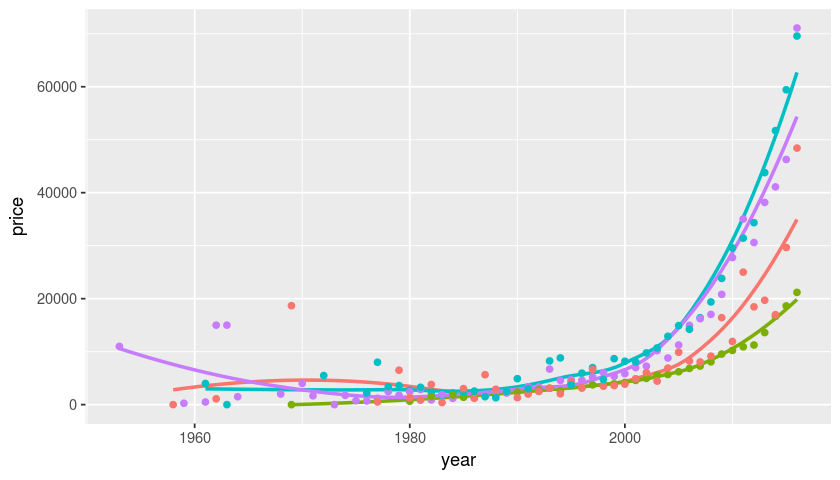

In [19]:
# Create the previous plot
p <- ggplot(aes(x = year, y = price, colour = drive), data = price_year_drive) + 
            geom_smooth(se = FALSE) + geom_point()
# Then suppress the legend
p + theme(legend.position = "none")

`geom_smooth()` using method = 'loess'


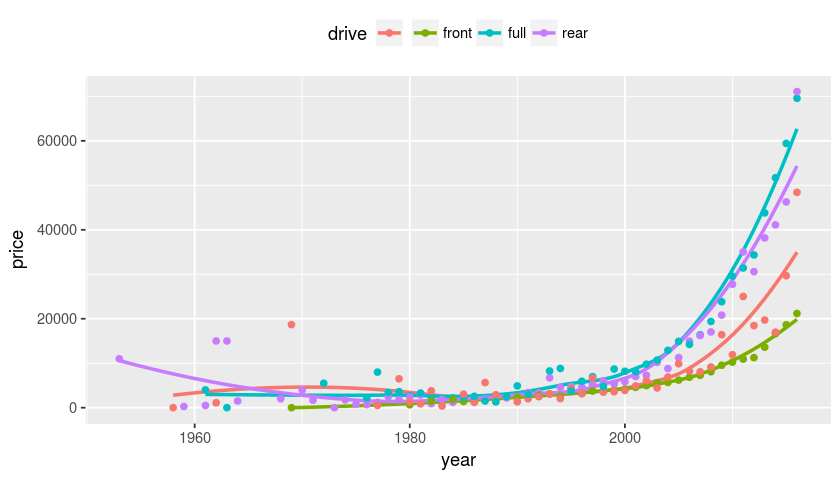

In [20]:
# Display the legend on the top of the chart
p + theme(legend.position = "top")

Options are `"none", "left", "right", "bottom", "top"` or a two element numeric vector for the coordinates of where to place the legend.

`geom_smooth()` using method = 'loess'


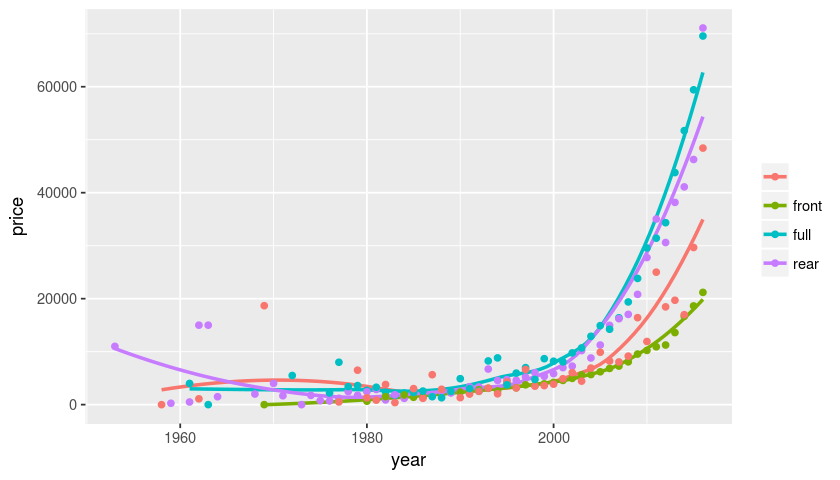

In [28]:
# Removing the legend title
p + theme(legend.title = element_blank())

# Exercise 2.7

**Question 1**

The `ggplot2` package can create box plots. With the `auto` dataset, use the `qplot` function to create a boxplot of `log(price)` `(x)` by `engType` `(y)`  by setting the `geom` parameter to `"boxplot"`.

Now set teh `fill` parameter to `"registration"`. What does this imply about the effect of registering the car on price?

Repeat the plot with the `ggplot` function instead of `qplot` and use the `body` variable rather than the `engType` variable. Use the `geom_boxplot` function

**Question 2**

The `ggplot2` package can create bar plots. With the `auto` dataset, use the `qplot` function to create a bar plot of `registration` by setting `geom` to `"bar"`.

Now set the `fill` parameter to `drive`.

Repeat the plot with the `ggplot` function insteat of `qplot` and use `body` instead of `drive` for the `fill` parameter and use `geom_bar`. In the `geom_bar` function set position to `"dodge"`, now change it to `"fill"`.

**Question 3**

The `ggplot2` package can create histograms. With the `auto` dataset, use the `qplot` function to create a `geom`  `"histogram"` of the `log(price)` data and then `facet_wrap` with `drive`.

Repeat the plot using the `ggplot` and `geom_histogram` functions.

**Question 4**

The `ggplot2` package can create density plots. With the `auto` dataset, use the `ggplot` function to create a `geom_density` plot of the `log(price)` data. Now `facet_wrap` with the `body` variable.

Remove the `facet_wrap` addition and set `fill` to `body` in `aes`.

**Question 5**

The `ggplot2` package incorporates various colour palettes obtained from the `colorbrewer` package. Add the `scale_fill_bewer` function and set the `palette` parameter to `"Set1"`. Change the palette to `"Set2"`.